In [103]:
#Setup
import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [104]:
cc_data=pd.read_csv("cc_data.csv")
cc_data.head()

,Unnamed: 0,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,merch_lat,merch_long,gender
0,471033,2020-08-16 23:34:52,kids_pets,31.93,Shields,ND,46.1838,-101.2589,77,1989-12-17,45.455940,-100.470589,F
1,35353,2019-04-08 21:18:33,home,11.59,Daly City,CA,37.6787,-122.4780,107941,1991-10-04,36.716307,-122.974625,NaN
2,391141,2020-07-13 05:47:18,food_dining,37.97,Bailey,NC,35.8072,-78.0892,6629,1962-08-13,36.530192,-78.072629,F
3,369533,2020-07-04 03:59:39,gas_transport,58.38,Whaleyville,MD,38.4121,-75.2811,718,1985-03-19,39.172607,-75.400129,F
4,767951,2020-12-25 03:43:30,grocery_pos,107.58,Utica,PA,41.4798,-79.9403,1102,1989-07-08,41.149434,-80.700821,M


In [105]:
cc_data["state"].nunique()

50

In [125]:
cc_data[['trans_date', 'trans_time']] = cc_data['trans_date_trans_time'].str.split(' ', n=1, expand=True)
cc_data[["hour","min:sec"]]=cc_data["trans_time"].str.split(":",n=1,expand=True)
cc_data.head()

,Unnamed: 0,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,merch_lat,merch_long,gender,trans_date,trans_time,hour,min:sec
0,471033,2020-08-16 23:34:52,kids_pets,31.93,Shields,ND,46.1838,-101.2589,77,1989-12-17,45.455940,-100.470589,F,2020-08-16,23:34:52,23,34:52
1,35353,2019-04-08 21:18:33,home,11.59,Daly City,CA,37.6787,-122.4780,107941,1991-10-04,36.716307,-122.974625,NaN,2019-04-08,21:18:33,21,18:33
2,391141,2020-07-13 05:47:18,food_dining,37.97,Bailey,NC,35.8072,-78.0892,6629,1962-08-13,36.530192,-78.072629,F,2020-07-13,05:47:18,05,47:18
3,369533,2020-07-04 03:59:39,gas_transport,58.38,Whaleyville,MD,38.4121,-75.2811,718,1985-03-19,39.172607,-75.400129,F,2020-07-04,03:59:39,03,59:39
4,767951,2020-12-25 03:43:30,grocery_pos,107.58,Utica,PA,41.4798,-79.9403,1102,1989-07-08,41.149434,-80.700821,M,2020-12-25,03:43:30,03,43:30


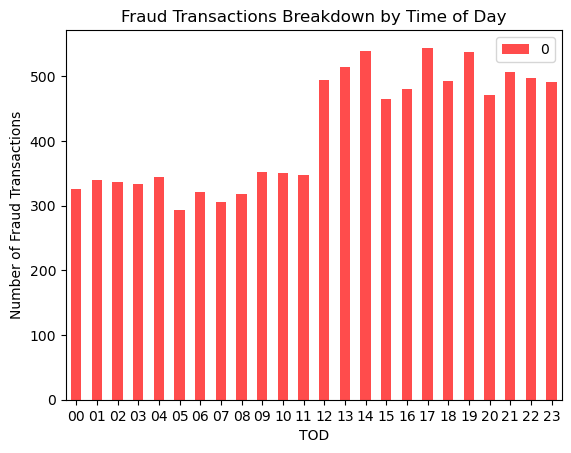

In [160]:
# Group by 'Trans Month' and count the number of fraud transactions in each month
fraud_by_tod = cc_data.groupby('hour').size()
fraud_by_tod=pd.DataFrame(fraud_by_tod)

title = "Fraud Transactions Breakdown by Time of Day"
# Create a bar graph
fraud_by_tod.plot(kind='bar', color='red', alpha=0.7)
plt.title(title)
plt.xlabel('TOD')
plt.ylabel('Number of Fraud Transactions')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.show()



In [107]:
cc_data.count()


Unnamed: 0               10000
trans_date_trans_time    10000
category                 10000
amt                      10000
city                     10000
state                    10000
lat                      10000
long                     10000
city_pop                 10000
dob                      10000
merch_lat                10000
merch_long               10000
gender                    7040
trans_date               10000
trans_time               10000
dtype: int64

In [108]:
category_sum=cc_data.groupby('category')["amt"].sum()
category_df=pd.DataFrame(category_sum)
category_df

,amt
category,
entertainment,42033.98
food_dining,36341.67
gas_transport,65157.35
grocery_net,20421.28
grocery_pos,111665.06
health_fitness,34996.80
home,55475.03
kids_pets,49175.87
misc_net,40161.54


array([<Axes: ylabel=' '>], dtype=object)

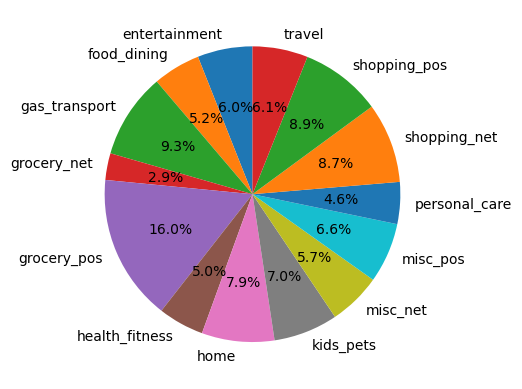

In [109]:
category_df.plot.pie(subplots=True,autopct="%1.1f%%",legend=False,ylabel=" ",startangle=90)

In [110]:
category=pd.DataFrame(cc_data["category"].value_counts())
category

,count
category,
gas_transport,1042
home,949
grocery_pos,933
shopping_pos,907
kids_pets,863
shopping_net,758
food_dining,716
entertainment,693
misc_pos,670


array([<Axes: ylabel=' '>], dtype=object)

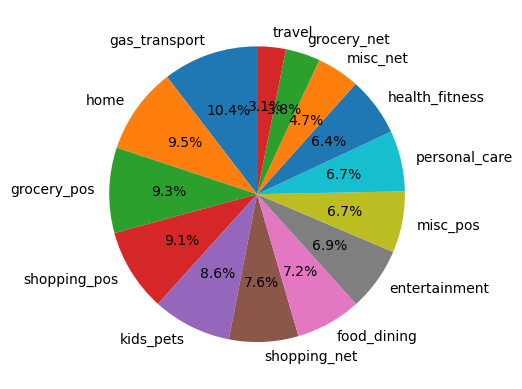

In [111]:
category.plot(kind='pie',subplots=True,autopct="%1.1f%%",legend=False,ylabel=" ",startangle=90)

In [112]:
gender_plot=cc_data.hvplot.points("long","lat",geo=True,tiles="OSM",color="gender",hover_cols=["state","category"])
gender_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [long,lat]   (gender,state,category)

In [113]:
alaska_df=cc_data.loc[cc_data["state"]=="AK"]
alaska_df

,Unnamed: 0,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,merch_lat,merch_long,gender,trans_date,trans_time
541,336425,2020-12-28 07:22:32,shopping_net,6.05,Wales,AK,64.7556,-165.6723,145,1939-11-09,64.924942,-166.034386,M,2020-12-28,07:22:32
1460,185003,2020-02-17 23:45:26,entertainment,39.57,Huslia,AK,65.6899,-156.2920,277,1965-11-06,64.819398,-155.890378,NaN,2020-02-17,23:45:26
1664,232812,2020-06-11 15:45:51,entertainment,77.05,Wales,AK,64.7556,-165.6723,145,1939-11-09,64.994862,-165.910617,NaN,2020-06-11,15:45:51
1666,216227,2020-05-07 08:11:24,gas_transport,43.74,Wales,AK,64.7556,-165.6723,145,1939-11-09,63.850908,-166.114254,NaN,2020-05-07,08:11:24
2014,251984,2020-07-18 16:42:44,home,3.67,Wales,AK,64.7556,-165.6723,145,1939-11-09,63.914713,-166.116436,M,2020-07-18,16:42:44
2509,252984,2020-07-20 09:53:32,misc_net,1.29,Wales,AK,64.7556,-165.6723,145,1939-11-09,65.047872,-166.564260,M,2020-07-20,09:53:32
2888,298311,2020-10-26 02:40:55,entertainment,25.23,Wales,AK,64.7556,-165.6723,145,1939-11-09,64.241979,-165.794852,M,2020-10-26,02:40:55
2939,147777,2019-12-05 08:48:49,shopping_pos,1.13,Huslia,AK,65.6899,-156.2920,277,1965-11-06,65.031694,-156.986100,NaN,2019-12-05,08:48:49
3189,27559,2019-03-22 01:54:09,grocery_pos,282.17,Kaktovik,AK,66.6933,-153.9940,239,1996-04-01,67.397018,-154.118108,NaN,2019-03-22,01:54:09
3466,185609,2020-02-20 17:02:31,home,44.60,Wales,AK,64.7556,-165.6723,145,1939-11-09,64.034220,-165.639862,NaN,2020-02-20,17:02:31


In [114]:
alaska_plot=alaska_df.hvplot.points("long","lat",geo=True,tiles="OSM",color="gender",hover_cols=["state","category"])
alaska_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [long,lat]   (gender,state,category)

In [115]:
continental_df=cc_data.loc[cc_data["state"]!="HI"]
continental_df.head()

,Unnamed: 0,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,dob,merch_lat,merch_long,gender,trans_date,trans_time
0,471033,2020-08-16 23:34:52,kids_pets,31.93,Shields,ND,46.1838,-101.2589,77,1989-12-17,45.455940,-100.470589,F,2020-08-16,23:34:52
1,35353,2019-04-08 21:18:33,home,11.59,Daly City,CA,37.6787,-122.4780,107941,1991-10-04,36.716307,-122.974625,NaN,2019-04-08,21:18:33
2,391141,2020-07-13 05:47:18,food_dining,37.97,Bailey,NC,35.8072,-78.0892,6629,1962-08-13,36.530192,-78.072629,F,2020-07-13,05:47:18
3,369533,2020-07-04 03:59:39,gas_transport,58.38,Whaleyville,MD,38.4121,-75.2811,718,1985-03-19,39.172607,-75.400129,F,2020-07-04,03:59:39
4,767951,2020-12-25 03:43:30,grocery_pos,107.58,Utica,PA,41.4798,-79.9403,1102,1989-07-08,41.149434,-80.700821,M,2020-12-25,03:43:30


In [116]:
continental_df_plot=continental_df.hvplot.points("long","lat",geo=True,tiles="OSM",color="gender",hover_cols=["state","category"])
continental_df_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [long,lat]   (gender,state,category)

In [117]:
contiguos_df=continental_df.loc[continental_df["state"]!="AK"]
contigous_plot=contiguos_df.hvplot.points("long","lat",geo=True,tiles="OSM",color="gender",hover_cols=["state","category"])
contigous_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [long,lat]   (gender,state,category)

In [122]:
contiguos_df=continental_df.loc[continental_df["state"]!="AK"]
contigous_plot=contiguos_df.hvplot.points("merch_long","merch_lat",geo=True,tiles="OSM",color="category")
contigous_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [merch_long,merch_lat]   (category)

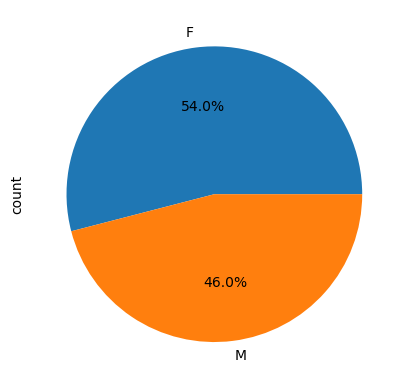

In [121]:
gender_dis=cc_data["gender"].value_counts()
gender_dis.plot.pie(autopct="%1.1f%%")
plt.show()
